# **Movie Rating Prediction Project 🎬📊**

**Load and Explore the Dataset**

In [ ]:
from google.colab import files

uploaded = files.upload()


**Extract and Load the Dataset**

In [ ]:
import zipfile
zip_file = "IMDb Movies India.csv.zip"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall()
import os
print(os.listdir())


['.config', 'IMDb Movies India.csv', 'IMDb Movies India.csv.zip', 'sample_data']


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("IMDb Movies India.csv", encoding="latin1")

df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


**Data Cleaning & Preprocessing**

In [ ]:
import numpy as np

# Convert 'Year' to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

if not pd.api.types.is_numeric_dtype(df['Duration']):
    df['Duration'] = pd.to_numeric(df['Duration'].str.extract('(\d+)')[0], errors='coerce')

if pd.api.types.is_string_dtype(df['Votes']):
    df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''), errors='coerce')

df = df.dropna(subset=['Rating'])

df.fillna({"Genre": "Unknown", "Director": "Unknown", "Actor 1": "Unknown",
           "Actor 2": "Unknown", "Actor 3": "Unknown"}, inplace=True)
df.isnull().sum()

,0
Name,0
Year,7919
Duration,2068
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


**Exploratory Data Analysis (EDA)**

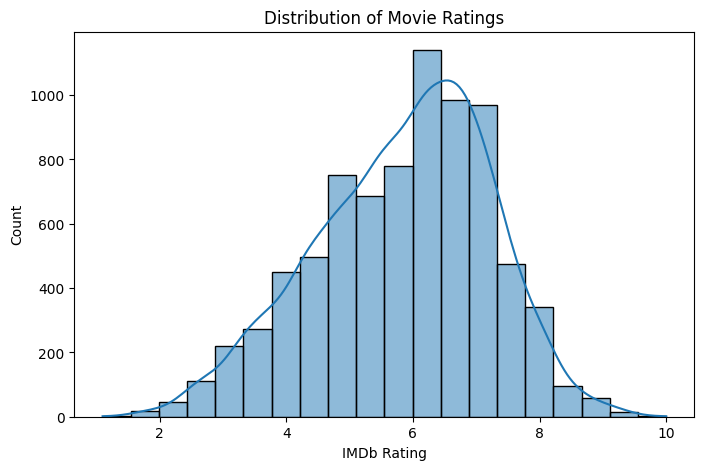

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Movie Rating Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Rating"], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Count")
plt.show()




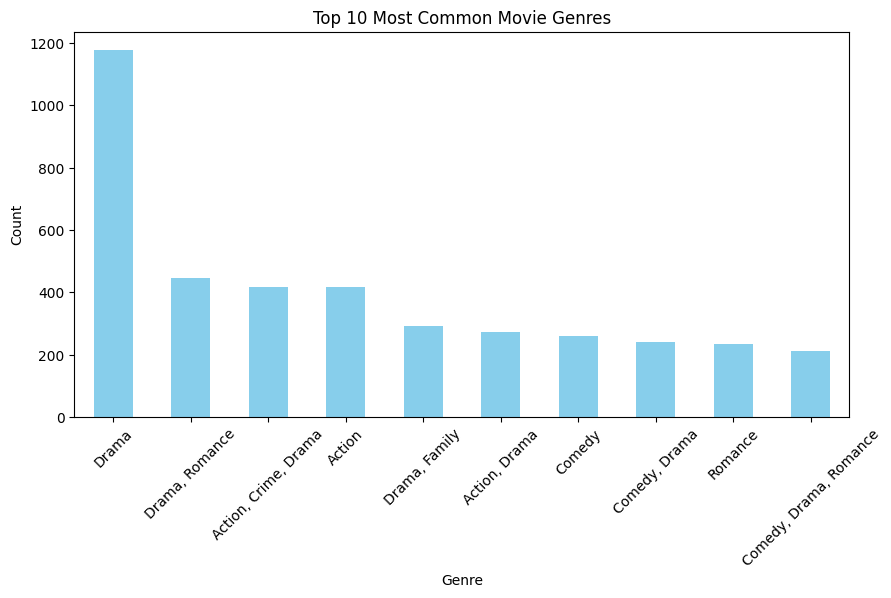

In [ ]:
# Top 10 Most Common Movie Genres
plt.figure(figsize=(10, 5))
df["Genre"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Most Common Movie Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

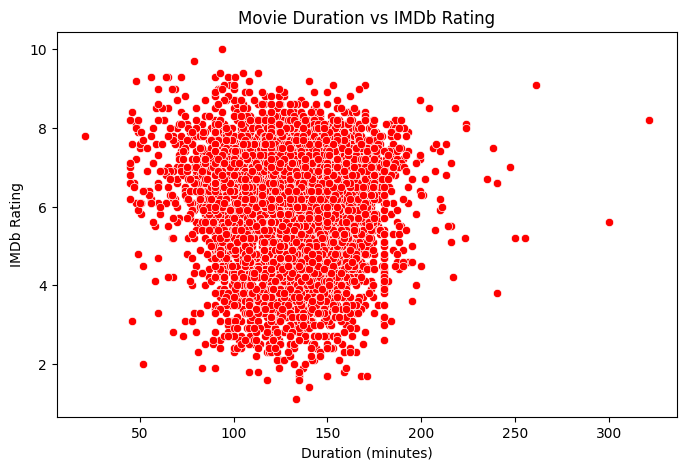

In [ ]:
#Relationship Between Duration and Ratings
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Duration"], y=df["Rating"], color="red")
plt.title("Movie Duration vs IMDb Rating")
plt.xlabel("Duration (minutes)")
plt.ylabel("IMDb Rating")
plt.show()


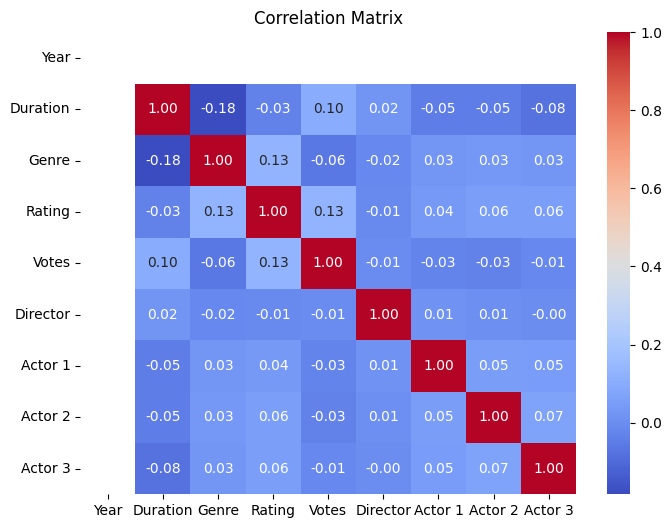

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
# Select only numeric features for correlation analysis
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Feature Engineering**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_enc = LabelEncoder()
df["Genre"] = label_enc.fit_transform(df["Genre"])
df["Director"] = label_enc.fit_transform(df["Director"])
df["Actor 1"] = label_enc.fit_transform(df["Actor 1"])
df["Actor 2"] = label_enc.fit_transform(df["Actor 2"])
df["Actor 3"] = label_enc.fit_transform(df["Actor 3"])

df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),NaN,109.0,268,7.0,8.0,811,1782,2815,377
3,#Yaaram,NaN,110.0,207,4.4,35.0,1749,1589,890,2572
5,...Aur Pyaar Ho Gaya,NaN,147.0,177,4.7,827.0,2005,508,85,2449
6,...Yahaan,NaN,142.0,331,7.4,1086.0,2643,931,1388,3030
8,?: A Question Mark,NaN,82.0,367,5.6,326.0,174,2521,1461,1205


**Train a Regression Model**

In [ ]:
#Split Data for Training & Testing

from sklearn.model_selection import train_test_split
features = ["Year", "Duration", "Votes", "Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]
X = df[features]
y = df["Rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Train a Linear Regression Model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



**Evaluate the Model**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 1.75
R-squared Score: 0.06


**Visualizing Predictions**

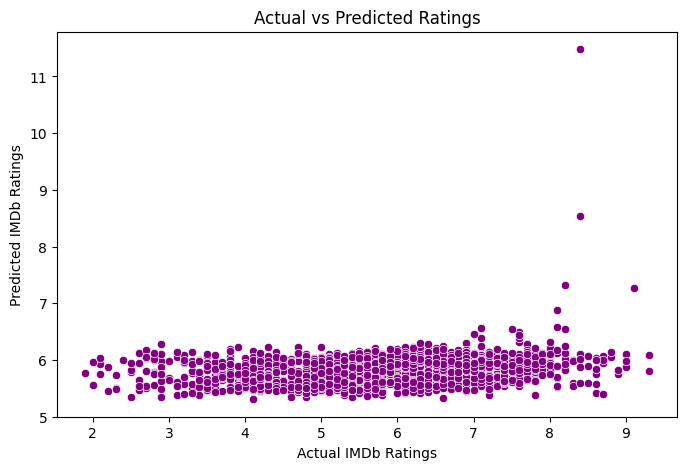

In [ ]:
#Actual vs Predicted Ratings
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color="purple")
plt.xlabel("Actual IMDb Ratings")
plt.ylabel("Predicted IMDb Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()


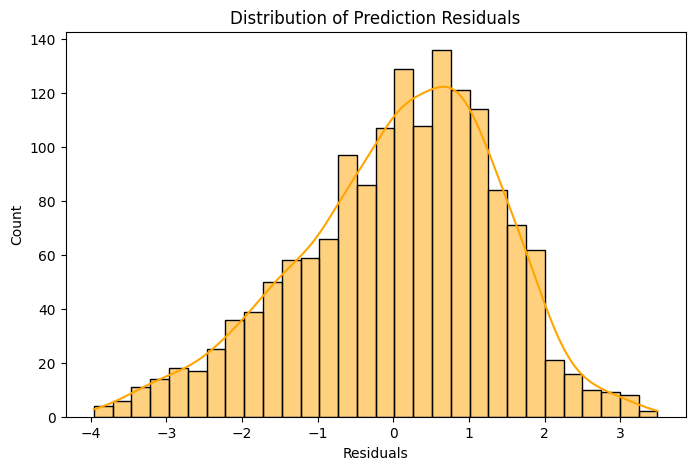

In [ ]:
#Residuals Distribution
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color="orange")
plt.title("Distribution of Prediction Residuals")
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.show()


**✅ Final Results**

Once everything runs successfully, you'll get:

✔ A trained Linear Regression model predicting IMDb ratings

✔ Various visualizations explaining the data

✔ Performance metrics (MSE, R² score) for evaluation